In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pyemma
import pyemma.coordinates as coor
import sys

In [10]:
total = 140
diff = 5
p=0
rpairs = []
for i in range(total - diff):
    for j in range(i+diff, total):
        rpairs.append([i,j])
        p += 1
rpairs = np.array(rpairs)
p

9180

In [13]:
np.savetxt('residue_pairs.txt', rpairs+1, fmt='%d')

In [35]:
ca_indices = []
for l in open('DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb', 'r'):
    i = l.strip().split()
    if i[0] == 'ATOM':
        if i[2] == 'CA':
            ca_indices.append(int(i[1]))
            
ca_indices = np.array(ca_indices).astype(int)

In [81]:
ca_pairs = []
for i in range(len(ca_indices)-diff):
    for j in range(i+diff, len(ca_indices)):
        ca_pairs.append( [ca_indices[i], ca_indices[j]] )
ca_pairs = np.array(ca_pairs)

In [82]:
ca_pairs.shape

(9180, 2)

In [83]:
rpairs.shape

(9180, 2)

In [40]:
pdb = coor.featurizer('DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb')

In [42]:
pdb.add_distances([[145,1856]], periodic=False)

In [43]:
traj = ['pnas2018b-asyn-a99SBdisp-extended-protein-combined.xtc']

In [44]:
dist1 = coor.source(traj, features=pdb).get_output()

In [54]:
dist0 = np.loadtxt('dist_ca_10-130.xvg', comments=['@','#'])[:,1]

In [48]:
dist0.shape

(73124,)

In [51]:
len(dist1[0])

73124

In [73]:
pdb = coor.featurizer('DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb')
pdb.add_distances([[144,1855]], periodic=False)
dist2 = coor.source(traj, features=pdb).get_output()

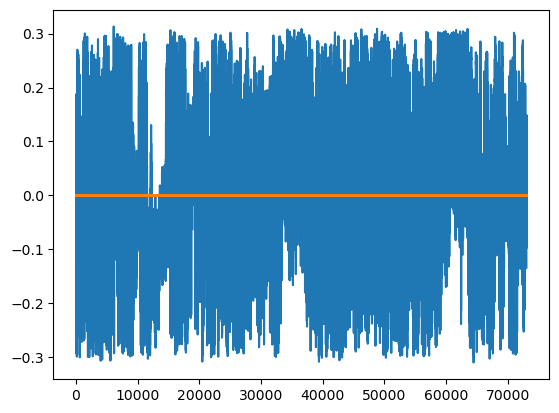

In [77]:
plt.plot(dist0 - dist1[0][:,0])
plt.plot(dist0 - dist2[0][:,0])

In [86]:
pdb = coor.featurizer('DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein.pdb')

pdb.add_distances(ca_pairs-1, periodic=False)

ca_dists = coor.source(traj, features=pdb).get_output()

getting output of FeatureReader:   0%|                                                                        …

In [89]:
ca_dists[0].shape

(73124, 9180)

In [90]:
np.save('ca_dists.npy', ca_dists)

## Rg

In [2]:
rg_ca = np.loadtxt('rg_ca.xvg', comments=['@','#'])[:,1]
rg_system = np.loadtxt('rg_system.xvg', comments=['@','#'])[:,1]

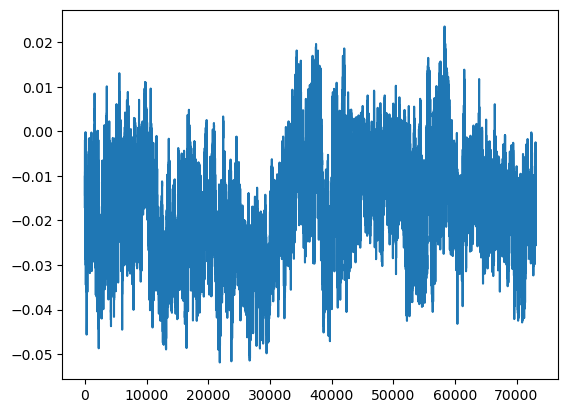

In [96]:
plt.plot( (rg_ca - rg_system)/rg_ca )

In [8]:
rg_ca.max()

7.22318

In [9]:
rg_ca.shape

(73124,)

In [14]:
bins = np.arange(rg_ca.min(), rg_ca.max(), 0.01)
xb = bins[1:] - (bins[1]-bins[0])/2

In [11]:
hrg, _ = np.histogram(rg_ca, bins=bins, density=True)

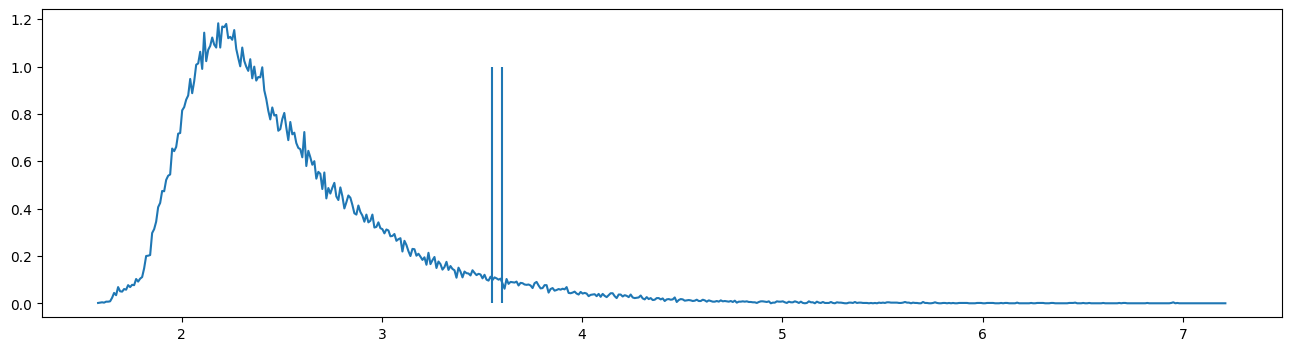

In [21]:
plt.figure(figsize=(16,4))
plt.plot(xb, hrg)
plt.vlines([3.6, 3.55], 0, 1)

In [22]:
np.where(rg_ca>=3.6)[0].shape[0]/rg_ca.shape[0]

0.04719380777856791